# import the library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# import dataset

In [2]:
USAHousing = pd.read_csv('USA_Housing.csv')
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# To find the information about the dataset
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Data Preprocessing 

### 1) Missing value treatement

In [5]:
USAHousing.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [6]:
USAHousing.isnull().sum()/len(USAHousing)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

In [7]:
# Check outlier and then will decide whether we have to use mean or median approach

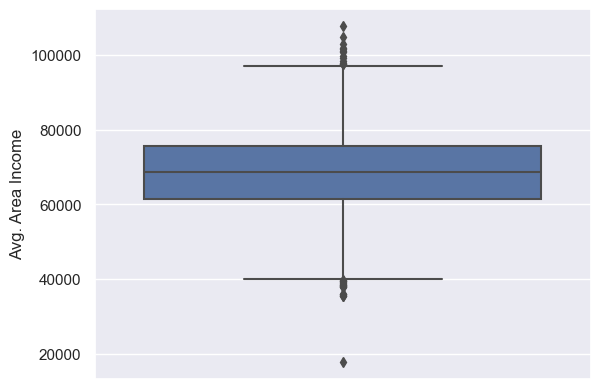

In [8]:
sns.boxplot(y = 'Avg. Area Income', data=USAHousing)
plt.show()

In [9]:
USAHousing['Avg. Area Income'] = USAHousing['Avg. Area Income'].fillna(USAHousing['Avg. Area Income'].median())

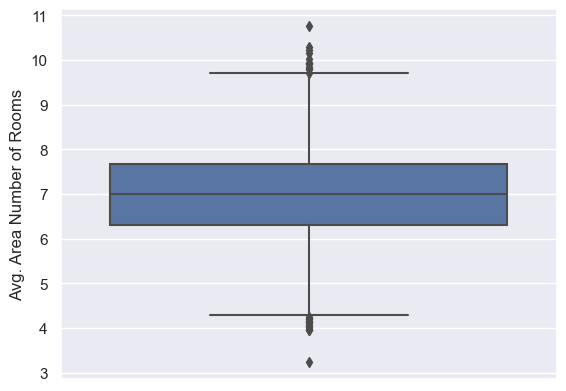

In [10]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data=USAHousing)
plt.show()

In [11]:
USAHousing['Avg. Area Number of Rooms'] = USAHousing['Avg. Area Number of Rooms'].fillna(USAHousing['Avg. Area Number of Rooms'].median())

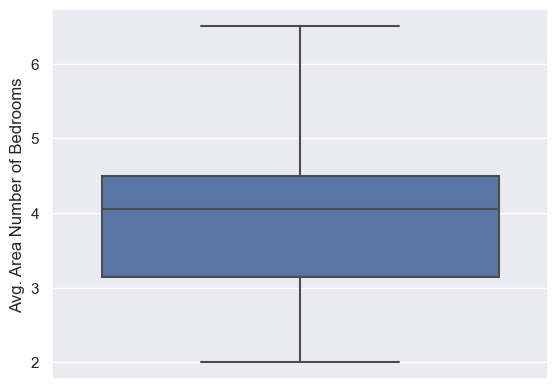

In [12]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms', data=USAHousing)
plt.show()

In [13]:
USAHousing['Avg. Area Number of Bedrooms'].describe()

count    4994.000000
mean        3.981874
std         1.234497
min         2.000000
25%         3.140000
50%         4.050000
75%         4.490000
max         6.500000
Name: Avg. Area Number of Bedrooms, dtype: float64

In [14]:
USAHousing['Avg. Area Number of Bedrooms'] = USAHousing['Avg. Area Number of Bedrooms'].fillna(USAHousing['Avg. Area Number of Bedrooms'].mean())

In [15]:
USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Part 2 - Encoding concept

In [16]:
USAHousing.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [17]:
USAHousing['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [18]:
USAHousing['Address'][1]

'188 Johnson Views Suite 079\nLake Kathleen, CA 48958'

In [19]:
# Address is non-significant variable to predict USA Housing price. hence, we have to drop this variable
USAHousing = USAHousing.iloc[:,0:-1]

In [20]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# Part 3 - Handling outlier 
# it's mandatory part whenever you solve regression problem
# outlier is sentive to regression problem

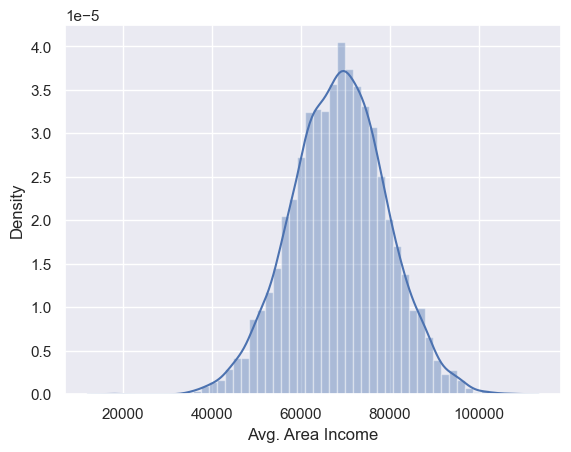

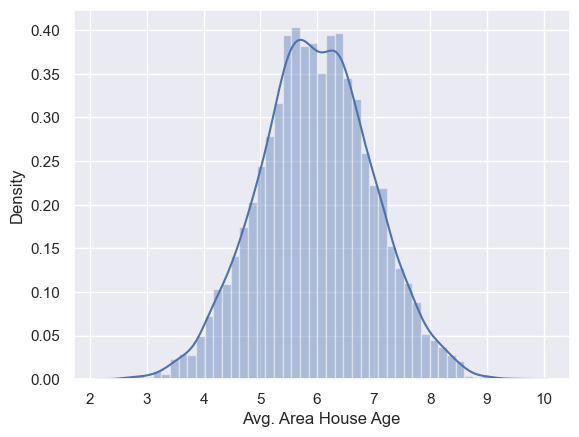

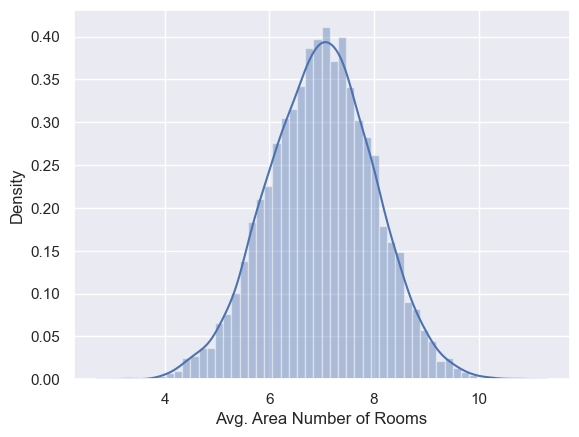

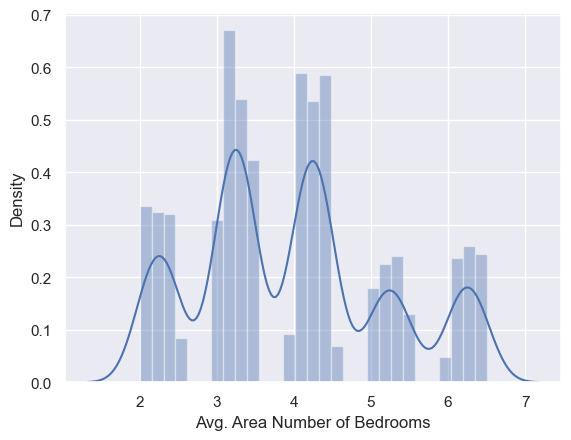

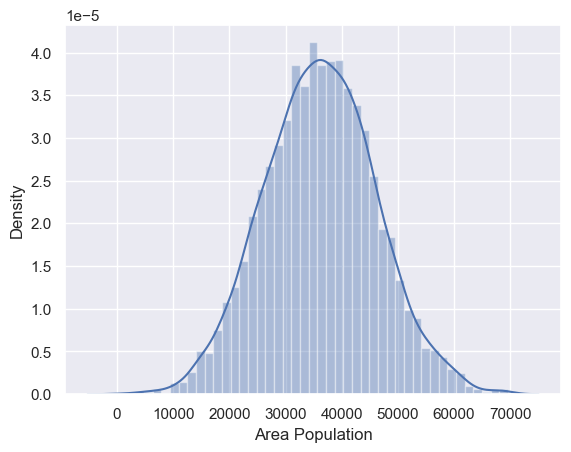

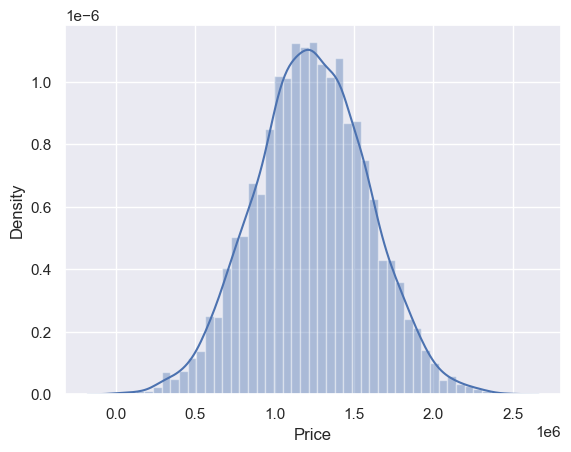

In [21]:
def distplots(col):
    sns.distplot(USAHousing[col])
    plt.show()
    
for i in list(USAHousing.columns)[0:]:
    distplots(i)

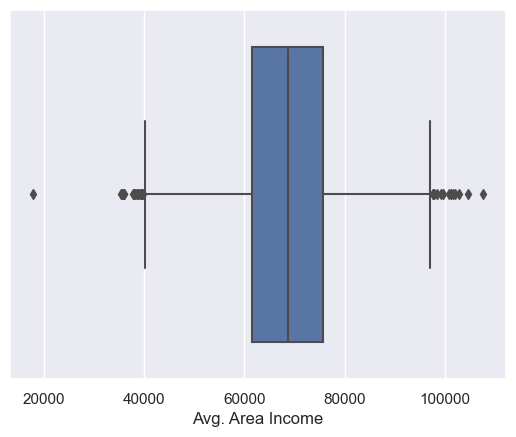

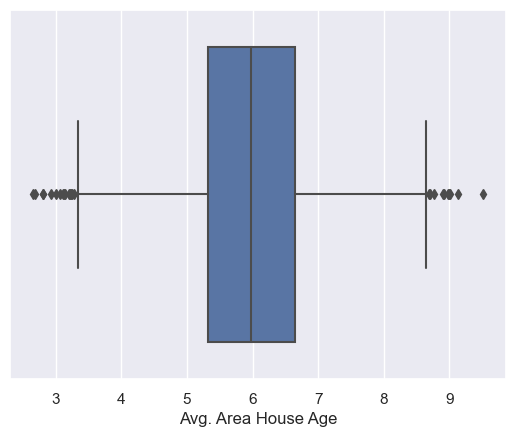

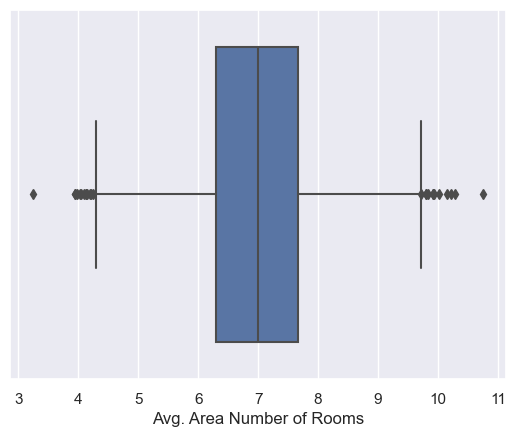

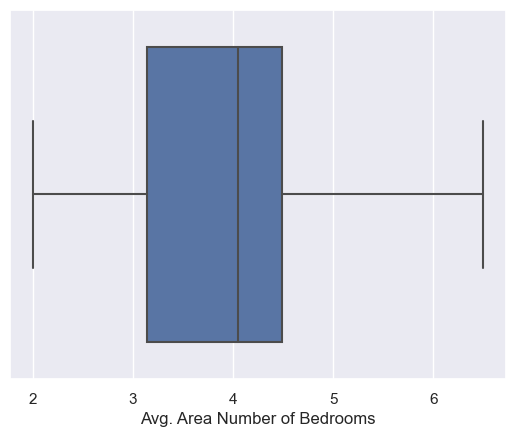

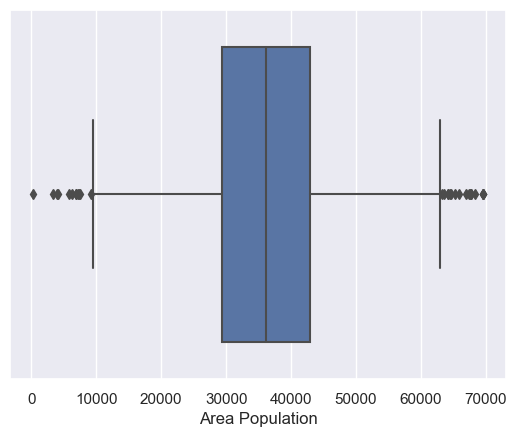

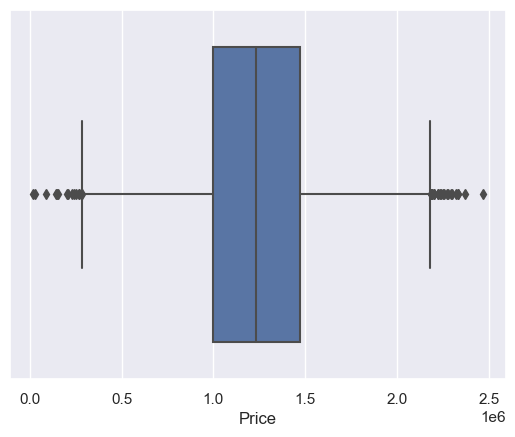

In [22]:
def boxplots(col):
    sns.boxplot(USAHousing[col])
    plt.show()
    
for i in list(USAHousing.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [23]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [24]:
# Please use capping method - one by one to handle the dataset - home work
# capping method required

Q1 = USAHousing.quantile(0.25)
Q3 = USAHousing.quantile(0.75)
IQR = Q3 - Q1

pos_outlier = Q3 + 1.5 * IQR

neg_outlier = Q1 - 1.5 * IQR

In [25]:
print(Q1)
print("*************"*5)
print(Q3)
print("*************"*5)
print(IQR)
print("*************"*5)
print(pos_outlier)
print("*************"*5)
print(neg_outlier)
print("*************"*5)

Avg. Area Income                 61485.150192
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299692
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928700
Price                           997577.135075
Name: 0.25, dtype: float64
*****************************************************************
Avg. Area Income                7.576652e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665281e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
*****************************************************************
Avg. Area Income                 14281.368910
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.365589
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362070
Price                           473633

In [26]:
new_df = USAHousing.copy()

In [27]:
# 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Area Population'

In [28]:
income_q1 = new_df['Avg. Area Income'].quantile(0.25)
income_q3 = new_df['Avg. Area Income'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr

In [29]:
new_df['Avg. Area Income'] = np.where(new_df['Avg. Area Income'] > income_upper, income_upper,
                                     np.where(new_df['Avg. Area Income'] < income_lower, income_lower,
                                            new_df['Avg. Area Income']) )

In [30]:
age_q1 = new_df['Avg. Area House Age'].quantile(0.25)
age_q3 = new_df['Avg. Area House Age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_upper = age_q3 + 1.5 * age_iqr
age_lower = age_q1 - 1.5 * age_iqr

In [31]:
new_df['Avg. Area House Age'] = np.where(new_df['Avg. Area House Age'] > age_upper,age_upper,
                                     np.where(new_df['Avg. Area House Age'] < age_lower, age_lower,
                                            new_df['Avg. Area House Age']) )

In [32]:
room_q1 = new_df['Avg. Area Number of Rooms'].quantile(0.25)
room_q3 = new_df['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr = room_q3 - room_q1
room_upper = room_q3 + 1.5 * room_iqr
room_lower = room_q1 - 1.5 * room_iqr

In [33]:
new_df['Avg. Area Number of Rooms'] = np.where(new_df['Avg. Area Number of Rooms'] > room_upper,room_upper,
                                     np.where(new_df['Avg. Area Number of Rooms'] < room_lower, room_lower,
                                            new_df['Avg. Area Number of Rooms']) )

In [34]:
pop_q1 = new_df['Area Population'].quantile(0.25)
pop_q3 = new_df['Area Population'].quantile(0.75)
pop_iqr = pop_q3 - pop_q1
pop_upper = pop_q3 + 1.5 * pop_iqr
pop_lower = pop_q1 - 1.5 * pop_iqr

In [35]:
new_df['Area Population'] = np.where(new_df['Area Population'] > pop_upper,pop_upper,
                                     np.where(new_df['Area Population'] < pop_lower, pop_lower,
                                            new_df['Area Population']) )

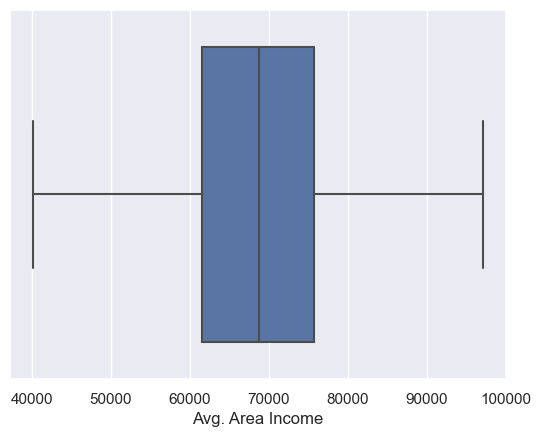

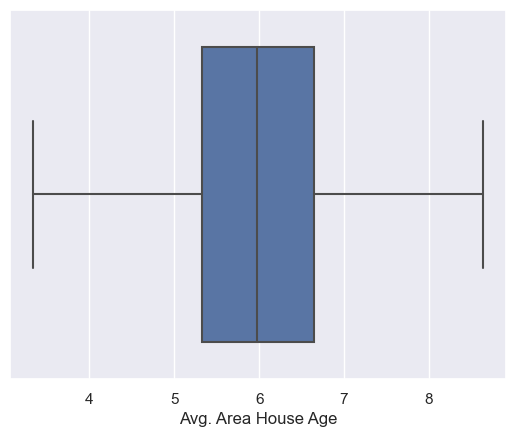

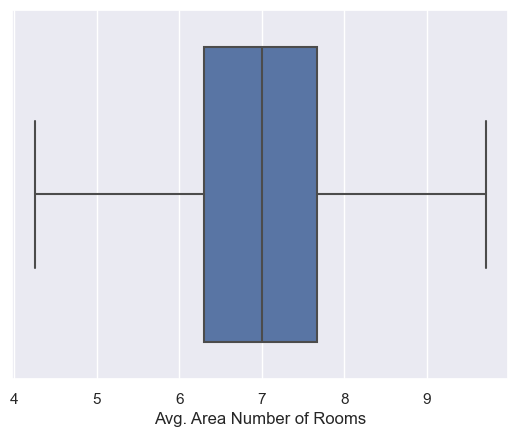

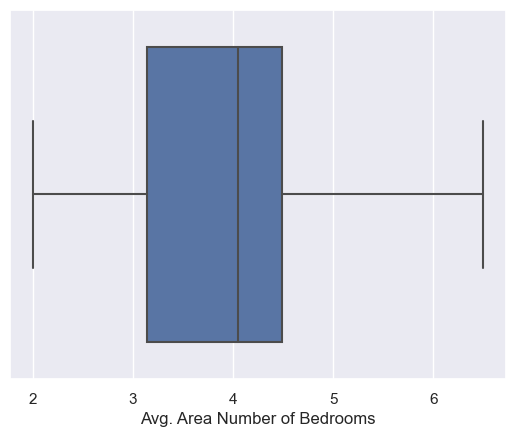

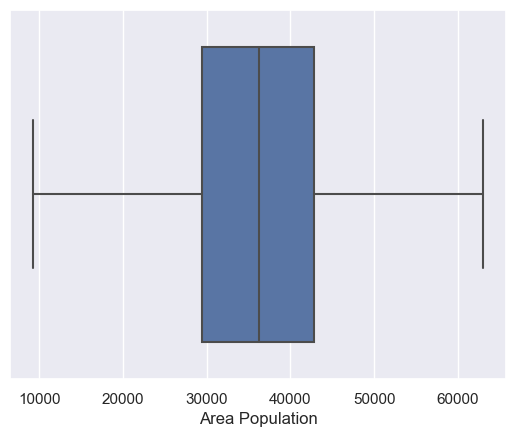

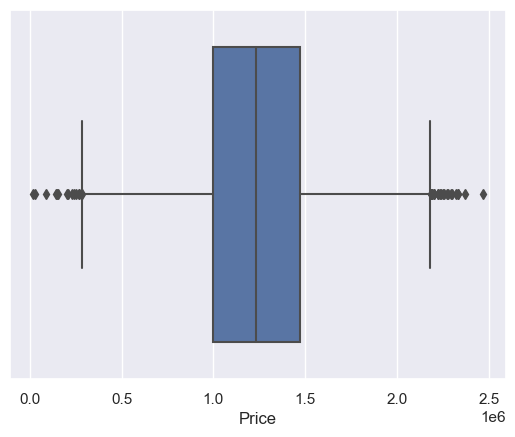

In [36]:
def boxplots(col):
    sns.boxplot(new_df[col])
    plt.show()
    
for i in list(new_df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [37]:
new_df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915


In [38]:
# Part 4 - Feature Scaling 
# we can only do with independent variable

# split the data into independent variable and dependent variable
x = new_df.iloc[:,0:-1]
y = new_df['Price']

In [39]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [40]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423039,-1.350917
4996,0.936679,1.035210,-0.410236,0.030905,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501155,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181977,0.655755


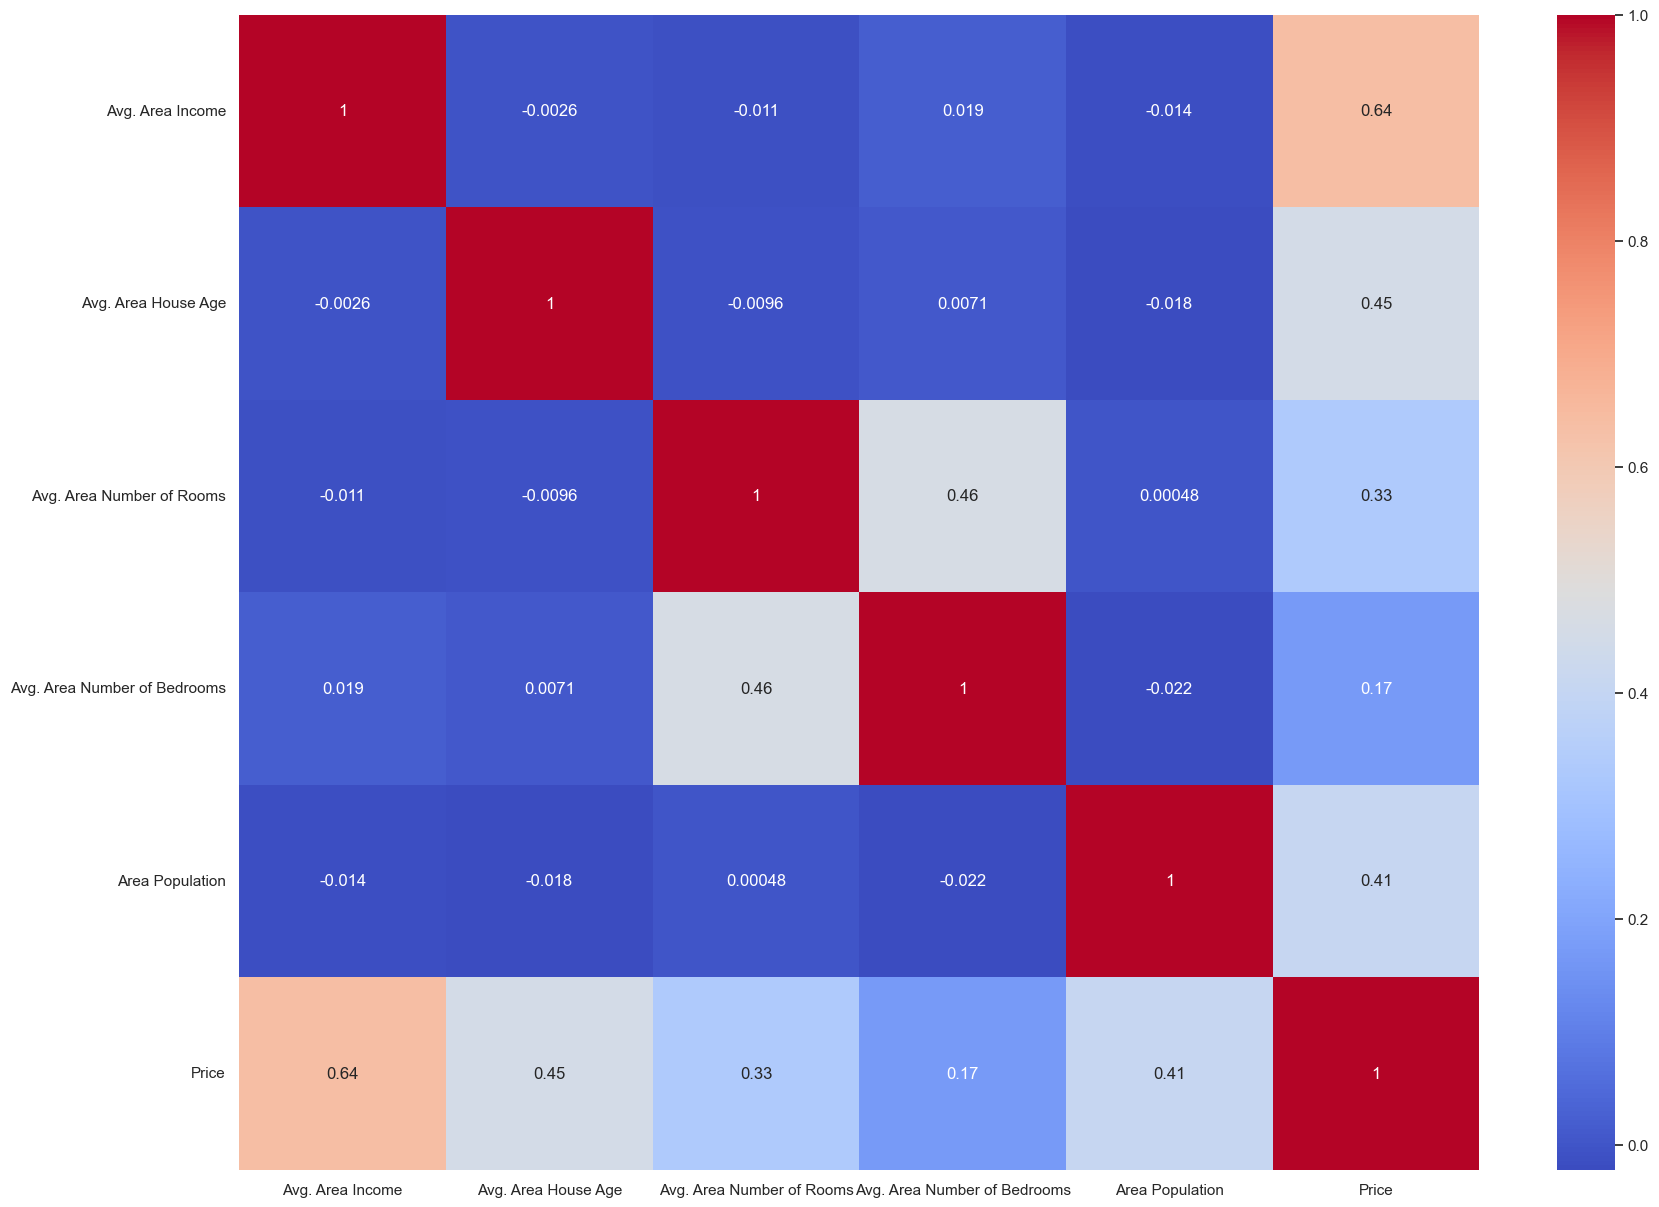

In [49]:
# Finding correlation
plt.figure(figsize=(20,15))
corr = new_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# VIF - Variance Inflation Factor - to check multicollinearity

In [52]:
variable = sc_x
variable.shape

(5000, 5)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

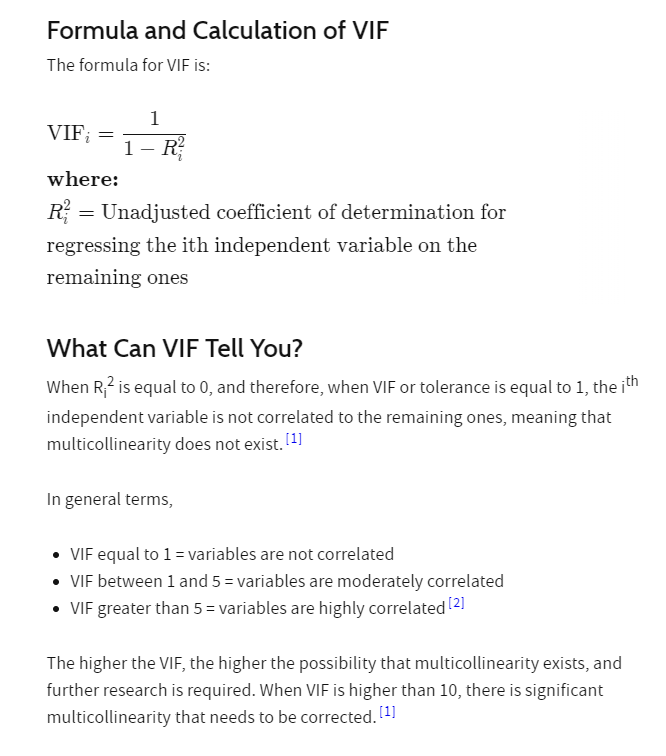

In [54]:
vif

,Variance Inflation Factor,Features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population


# Split the data into training and test for building the model and for prediction

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


# Building Linear Regression Model

## Approach no - 1

In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [58]:
print(lm.intercept_)
print()
print(lm.coef_)

-2657920.671950032

[2.17329521e+01 1.65689998e+05 1.21585113e+05 1.72972862e+03
 1.53020383e+01]


In [59]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [63]:
price = -2657920.671950032 + 2.17329521e+01*85000+ 1.65689998e+05*2+1.21585113e+05*3+ 1.72972862e+03*3+1.53020383e+01*38000
price

472182.2328099678

In [69]:
# Predict house price by using lm model with test dataset

y_pred_price = lm.predict(x_test)
y_pred_price_train = lm.predict(x_train)

In [65]:
y_pred_price

array([1258771.45427275,  821517.21510422, 1743518.71330163, ...,
       1117246.12554051,  718625.71886044, 1518230.71307469])

In [66]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1881    1.727211e+06
2800    1.707270e+06
1216    1.167450e+06
1648    7.241217e+05
3063    1.561234e+06
Name: Price, Length: 1250, dtype: float64

In [68]:
# Validate the actual price of the test data and predicted price

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_price)

0.913624960698401

In [70]:
r2_score(y_train, y_pred_price_train)

0.9165095446547409

# Approach no 2 - OLS Method

In [71]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [72]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

In [73]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.011e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):                        0.00
Time:                        09:28:44   Log-Likelihood:                         -51812.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2091      0.314     32.560      0.000       9.594      10.824
Avg. Area House Age           4.916e+04   3478.628     14.131      0.000    4.23e+04     5.6e+04
Avg. Area Number of Rooms     -1.09e+04   3801.722     -2.868      0.004   -1.84e+04   -3450.477
Avg. Area Number of Bedrooms  5112.9468   3631.181      1.408      0.159   -2006.339    1.22e+04
Area Population                  8.5764      0.382     22.429      0.000       7.827       9.326
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.258
Skew:                          -0.000   Prob(JB):                        0.879
Kurtosis:                       2.959   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# There is no autocorrelation in Linear Regression model
# what to do when the assumption (autocorrelation) fails ?
## 1) Lagged variable - 
## 2) Difference - 
## 3) Generalized least squares
## Time Series Models - AR, MA, ARMA, ARIMA,STL
## Robust Standard Error - HAC

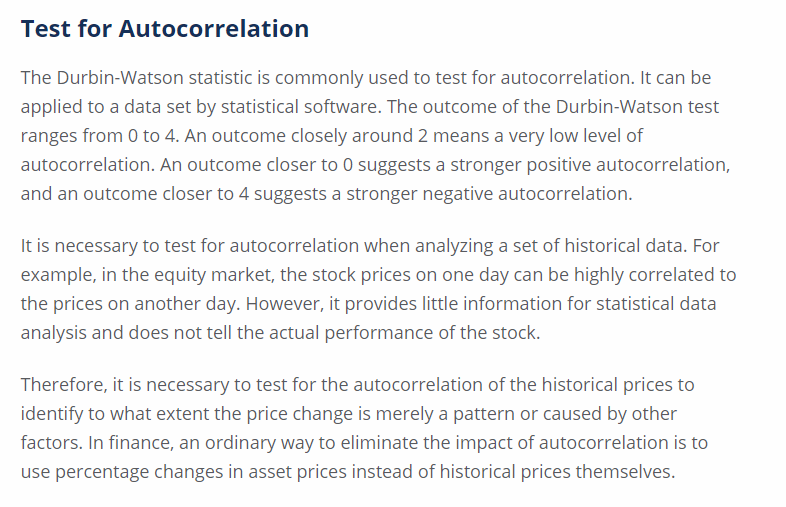

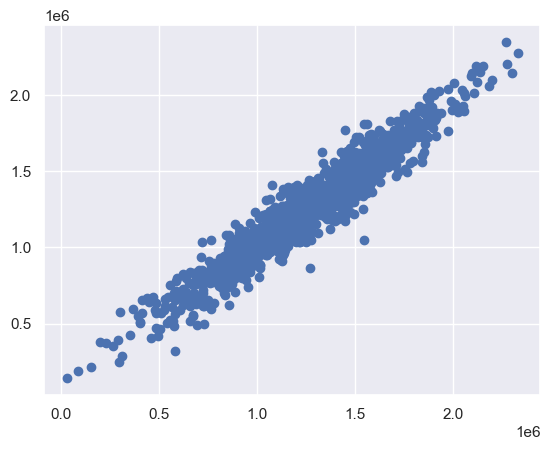

In [74]:
# Check linearity

plt.scatter(y_test, y_pred_price)

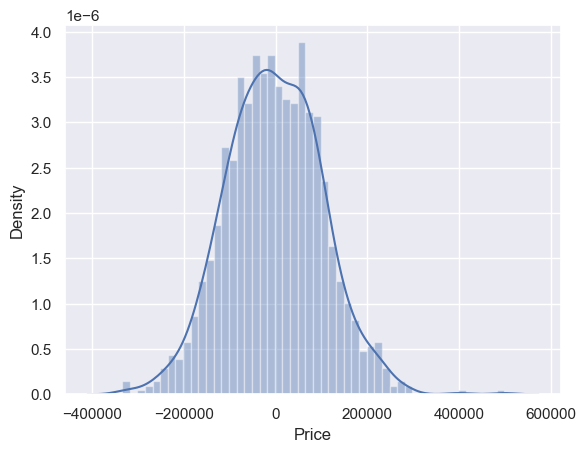

In [76]:
# Normality of Residual

sns.distplot((y_test - y_pred_price), bins=50)
plt.show()

In [ ]:
# Conclude this model
# Data Preprocessing - 
# EDA
# Slip the data into train and test


## Adj. R-squared (uncentered):	0.964
## All variable is statically significant (p <= 0.05) 
# task - please drop "Avg. Area Number of Bedrooms" and then follow the same approach
# check underfitting or overfitting problem - no bias and variance found
## Assumptions

# 1) Linearity - Satisfied
# 2) Normality of Residuals- Satisfied
# 3) Homoscedasticity - Satisfied (there is no outlier and residual is normaly distributed)
# 4) No autocorrelation - Satisfied
# 5) No or little Multicollinearity - satisfied
# 6) No endogenity problem - satisfied 

In [ ]:
# Regularisazation
# Gradient Descent 